In [2]:
# Copyright (c) Microsoft Corporation.
# Licensed under the MIT License.

"""Benchmark all the baseline agents
on a given CyberBattleSim environment and compare
them to the dumb 'random agent' baseline.

NOTE: You can run this `.py`-notebook directly from VSCode.
You can also generate a traditional Jupyter Notebook
using the VSCode command `Export Currenty Python File As Jupyter Notebook`.
"""

# pylint: disable=invalid-name

"Benchmark all the baseline agents\non a given CyberBattleSim environment and compare\nthem to the dumb 'random agent' baseline.\n\nNOTE: You can run this `.py`-notebook directly from VSCode.\nYou can also generate a traditional Jupyter Notebook\nusing the VSCode command `Export Currenty Python File As Jupyter Notebook`.\n"

In [3]:
import sys
import os
import logging
import gymnasium as gym
import cyberbattle.agents.baseline.learner as learner
import cyberbattle.agents.baseline.plotting as p
import cyberbattle.agents.baseline.agent_wrapper as w
import cyberbattle.agents.baseline.agent_randomcredlookup as rca
import cyberbattle.agents.baseline.agent_tabularqlearning as tqa
import cyberbattle.agents.baseline.agent_dql as dqla
from cyberbattle.agents.baseline.agent_wrapper import Verbosity
from cyberbattle._env.cyberbattle_env import CyberBattleEnv

logging.basicConfig(stream=sys.stdout, level=logging.ERROR, format="%(levelname)s: %(message)s")

In [4]:
%matplotlib inline

In [5]:
# Papermill notebook parameters
gymid = "CyberBattleChain-v0"
env_size = 10
iteration_count = 9000
training_episode_count = 50
eval_episode_count = 5
maximum_node_count = 22
maximum_total_credentials = 22
plots_dir = "output/plots"

In [6]:
# Parameters
gymid = "CyberBattleToyCtf-v0"
env_size = None
iteration_count = 1500
training_episode_count = 20
eval_episode_count = 10
maximum_node_count = 12
maximum_total_credentials = 10
plots_dir = "notebooks/output/benchmark/plots"


In [7]:
os.makedirs(plots_dir, exist_ok=True)

# Load the Gym environment
if env_size:
    _gym_env = gym.make(gymid, size=env_size)
else:
    _gym_env = gym.make(gymid)

from typing import cast

gym_env = cast(CyberBattleEnv, _gym_env.unwrapped)
assert isinstance(gym_env, CyberBattleEnv), f"Expected CyberBattleEnv, got {type(gym_env)}"

ep = w.EnvironmentBounds.of_identifiers(maximum_node_count=maximum_node_count, maximum_total_credentials=maximum_total_credentials, identifiers=gym_env.identifiers)

In [8]:
debugging = False
if debugging:
    print(f"port_count = {ep.port_count}, property_count = {ep.property_count}")

    gym_env.environment
    # training_env.environment.plot_environment_graph()
    gym_env.environment.network.nodes
    gym_env.action_space
    gym_env.action_space.sample()
    gym_env.observation_space.sample()
    o0, _ = gym_env.reset()
    o_test, r, d, t, i = gym_env.step(gym_env.sample_valid_action())
    o0, _ = gym_env.reset()

    o0.keys()

    fe_example = w.RavelEncoding(ep, [w.Feature_active_node_properties(ep), w.Feature_discovered_node_count(ep)])
    a = w.StateAugmentation(o0)
    w.Feature_discovered_ports(ep).get(a)
    fe_example.encode_at(a, 0)

###### Credential lookups (ϵ-greedy)
Learning with: episode_count=10,iteration_count=1500,ϵ=0.9,ϵ_min=0.1, ϵ_expdecay=10000,
  ## Episode: 1/10 'Credential lookups (ϵ-greedy)' ϵ=0.9000, 


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 5|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 5|reward:   11.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 1|Iteration 9|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 1|Iteration 9|reward:   22.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 1|Iteration 14|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 1|Iteration 14|reward:   33.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 1|Iteration 26|reward:   33.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 1|Iteration 27|reward:   44.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 1|Iteration 27|reward:   44.0|last_reward_at:   27|Elapsed Time: 0:00:00||
Episode 1|Iteration 38|reward:   44.0|last_reward_at:   27|Elapsed Time: 0:00:00||
Episode 1|

  Episode 1 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/135 (0.01)
    explore-remote: 8/1127 (0.01)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/227 (0.01)
  exploit deflected to exploration: 4
  ## Episode: 2/10 'Credential lookups (ϵ-greedy)' ϵ=0.7886, 


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 2|Iteration 16|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 2|Iteration 28|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 2|Iteration 37|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 2|Iteration 37|reward:   22.0|last_reward_at:   37|Elapsed Time: 0:00:00||
Episode 2|Iteration 48|reward:   22.0|last_reward_at:   37|Elapsed Time: 0:00:00||
Episode 2|Iteration 57|reward:   22.0|last_reward_at:   37|Elapsed Time: 0:00:00||
Episode 2|Iteration 58|reward:   33.0|last_reward_at:   37|Elapsed Time: 0:00:00||
Episode 2|Iteration 58|reward:   33.0|last_reward_at:   58|Elapsed Time: 0:00:00||
Episode 

  Episode 2 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/132 (0.01)
    explore-remote: 8/978 (0.01)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/379 (0.01)
  exploit deflected to exploration: 23
  ## Episode: 3/10 'Credential lookups (ϵ-greedy)' ϵ=0.6927, 


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 9|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 9|reward:   11.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 3|Iteration 19|reward:   11.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 3|Iteration 29|reward:   22.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 3|Iteration 29|reward:   22.0|last_reward_at:   29|Elapsed Time: 0:00:00||
Episode 3|Iteration 38|reward:   22.0|last_reward_at:   29|Elapsed Time: 0:00:00||
Episode 3|Iteration 52|reward:   22.0|last_reward_at:   29|Elapsed Time: 0:00:00||
Episode 3|Iteration 59|reward:   33.0|last_reward_at:   29|Elapsed Time: 0:00:00||
Episode 3|Iteration 59|reward:   33.0|last_reward_at:   59|Elapsed Time: 0:00:00||
Episode 3|Iteration 69|reward:   44.0|last_reward_at:   59|Elapsed Time: 0:00:00||
Episode 

  Episode 3 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/140 (0.01)
    explore-remote: 8/887 (0.01)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/462 (0.00)
  exploit deflected to exploration: 85
  ## Episode: 4/10 'Credential lookups (ϵ-greedy)' ϵ=0.6102, 


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 4|Iteration 4|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 4|Iteration 4|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 4|Iteration 18|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 4|Iteration 30|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 4|Iteration 38|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 4|Iteration 49|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 4|Iteration 53|reward:   36.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 4|Iteration 53|reward:   36.0|last_reward_at:   53|Elapsed Time: 0:00:00||
Episode 4|

  Episode 4 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/99 (0.01)
    explore-remote: 8/796 (0.01)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/594 (0.00)
  exploit deflected to exploration: 37
  ## Episode: 5/10 'Credential lookups (ϵ-greedy)' ϵ=0.5391, 


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 5|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 5|Iteration 9|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 5|Iteration 9|reward:   11.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 5|Iteration 19|reward:   11.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 5|Iteration 22|reward:   22.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 5|Iteration 22|reward:   22.0|last_reward_at:   22|Elapsed Time: 0:00:00||
Episode 5|Iteration 28|reward:   36.0|last_reward_at:   22|Elapsed Time: 0:00:00||
Episode 5|Iteration 28|reward:   36.0|last_reward_at:   28|Elapsed Time: 0:00:00||
Episode 5|Iteration 29|reward:   86.0|last_reward_at:   28|Elapsed Time: 0:00:00||
Episode 5|Iteration 29|reward:   86.0|last_reward_at:   29|Elapsed Time: 0:00:00||
Episode 5|Iteration 38|reward:   86.0|last_reward_at:   29|Elapsed Time: 0:00:00||
Episode 

  Episode 5 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/76 (0.01)
    explore-remote: 8/722 (0.01)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/691 (0.00)
  exploit deflected to exploration: 32
  ## Episode: 6/10 'Credential lookups (ϵ-greedy)' ϵ=0.4779, 


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 6|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 6|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 6|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 6|Iteration 4|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 6|Iteration 4|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 6|Iteration 16|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 6|Iteration 19|reward:   31.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 6|Iteration 19|reward:   31.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 6|Iteration 31|reward:   42.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 6|Iteration 31|reward:   42.0|last_reward_at:   31|Elapsed Time: 0:00:00||
Episode 6|Iteration 47|reward:   42.0|last_reward_at:   31|Elapsed Time: 0:00:00||
Episode 6|

  Episode 6 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/85 (0.01)
    explore-remote: 8/634 (0.01)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/770 (0.00)
  exploit deflected to exploration: 10
  ## Episode: 7/10 'Credential lookups (ϵ-greedy)' ϵ=0.4253, 


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 7|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 7|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 7|Iteration 10|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 7|Iteration 19|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 7|Iteration 30|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 7|Iteration 30|reward:   22.0|last_reward_at:   30|Elapsed Time: 0:00:00||
Episode 7|Iteration 31|reward:   33.0|last_reward_at:   30|Elapsed Time: 0:00:00||
Episode 7|Iteration 31|reward:   33.0|last_reward_at:   31|Elapsed Time: 0:00:00||
Episode 7|Iteration 45|reward:   33.0|last_reward_at:   31|Elapsed Time: 0:00:00||
Episode 7|Iteration 47|reward:   42.0|last_reward_at:   31|Elapsed Time: 0:00:00||
Episode 7|Iteration 47|reward:   42.0|last_reward_at:   47|Elapsed Time: 0:00:00||
Episode

  Episode 7 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/70 (0.01)
    explore-remote: 8/593 (0.01)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/826 (0.00)
  exploit deflected to exploration: 19
  ## Episode: 8/10 'Credential lookups (ϵ-greedy)' ϵ=0.3800, 


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 8|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 8|Iteration 4|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 8|Iteration 4|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 8|Iteration 7|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 8|Iteration 7|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 8|Iteration 16|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 8|Iteration 23|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 8|Iteration 32|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 8|Iteration 35|reward:   33.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 8|Iteration 35|reward:   33.0|last_reward_at:   35|Elapsed Time: 0:00:00||
Episode 8|Iteration 39|reward:   42.0|last_reward_at:   35|Elapsed Time: 0:00:00||
Episode 8|

  Episode 8 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/85 (0.01)
    explore-remote: 8/502 (0.02)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/902 (0.00)
  exploit deflected to exploration: 27
  ## Episode: 9/10 'Credential lookups (ϵ-greedy)' ϵ=0.3410, 


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 9|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 9|Iteration 8|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 9|Iteration 8|reward:   11.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 9|Iteration 13|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 9|Iteration 13|reward:   22.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 9|Iteration 15|reward:   36.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 9|Iteration 15|reward:   36.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 9|Iteration 17|reward:   86.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 9|Iteration 17|reward:   86.0|last_reward_at:   17|Elapsed Time: 0:00:00||
Episode 9|Iteration 20|reward:   92.0|last_reward_at:   17|Elapsed Time: 0:00:00||
Episode 9|Iteration 20|reward:   92.0|last_reward_at:   20|Elapsed Time: 0:00:00||
Episode 

  Episode 9 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/88 (0.01)
    explore-remote: 8/611 (0.01)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/790 (0.00)
  exploit deflected to exploration: 207
  ## Episode: 10/10 'Credential lookups (ϵ-greedy)' ϵ=0.3074, 


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 10|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 10|Iteration 6|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 10|Iteration 6|reward:   11.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 10|Iteration 17|reward:   11.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 10|Iteration 29|reward:   11.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 10|Iteration 33|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 10|Iteration 33|reward:   22.0|last_reward_at:   33|Elapsed Time: 0:00:00||
Episode 10|Iteration 47|reward:   22.0|last_reward_at:   33|Elapsed Time: 0:00:00||
Episode 10|Iteration 55|reward:   36.0|last_reward_at:   33|Elapsed Time: 0:00:00||
Episode 10|Iteration 55|reward:   36.0|last_reward_at:   55|Elapsed Time: 0:00:00||
Episode 10|Iteration 56|reward:   86.0|last_reward_at:   55|Elapsed Time: 0:00:0

  Episode 10 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/55 (0.02)
    explore-remote: 8/452 (0.02)
    explore-connect: 0/0 (NaN)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 2/982 (0.00)
  exploit deflected to exploration: 53
simulation ended


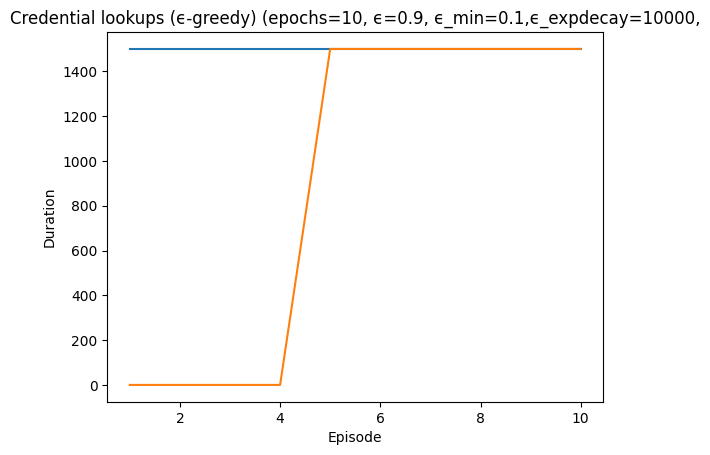

In [9]:
# Evaluate a random agent that opportunistically exploits
# credentials gathere in its local cache
credlookup_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=rca.CredentialCacheExploiter(),
    episode_count=10,
    iteration_count=iteration_count,
    epsilon=0.90,
    render=False,
    epsilon_exponential_decay=10000,
    epsilon_minimum=0.10,
    verbosity=Verbosity.Quiet,
    title="Credential lookups (ϵ-greedy)",
)

In [10]:
# Evaluate a Tabular Q-learning agent
tabularq_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=tqa.QTabularLearner(ep, gamma=0.015, learning_rate=0.01, exploit_percentile=100),
    episode_count=20,
    iteration_count=iteration_count,
    epsilon=0.90,
    epsilon_exponential_decay=5000,
    epsilon_minimum=0.01,
    verbosity=Verbosity.Quiet,
    render=False,
    plot_episodes_length=False,
    title="Tabular Q-learning",
)

###### Tabular Q-learning
Learning with: episode_count=20,iteration_count=1500,ϵ=0.9,ϵ_min=0.01, ϵ_expdecay=5000,γ=0.015,learning_rate=0.01,Q%=100
  ## Episode: 1/20 'Tabular Q-learning' ϵ=0.9000, γ=0.015,learning_rate=0.01,Q%=100


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 1|Iteration 17|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 1|Iteration 19|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 1|Iteration 32|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 1|Iteration 46|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 1|Iteration 48|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 1|Iteration 48|reward:   22.0|last_reward_at:   48|Elapsed Time: 0:00:00||
Episode 1|Iteration 53|reward:   33.0|last_reward_at:   48|Elapsed Time: 0:00:00||
Episode 1|Iteration 53|reward:   33.0|last_reward_at:   53|Elapsed Time: 0:00:00||
Episode 

  Episode 1 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/101 (0.02)
    explore-remote: 8/543 (0.01)
    explore-connect: 1/514 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/3 (0.00)
    exploit-connect: 2/326 (0.01)
  exploit deflected to exploration: 12
  ## Episode: 2/20 'Tabular Q-learning' ϵ=0.6695, γ=0.015,learning_rate=0.01,Q%=100


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 2|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 2|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 2|Iteration 10|reward:   33.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 2|Iteration 10|reward:   33.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 2|Iteration 13|reward:   47.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 2|Iteration 13|reward:   47.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 2|Iteration 16|reward:   97.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 2|Iteration 16|reward:   97.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 2|Iteration 29|reward:   97.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 2

  Episode 2 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/77 (0.03)
    explore-remote: 4/418 (0.01)
    explore-connect: 1/409 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 4/2 (0.67)
    exploit-connect: 2/581 (0.00)
  exploit deflected to exploration: 25
  ## Episode: 3/20 'Tabular Q-learning' ϵ=0.4985, γ=0.015,learning_rate=0.01,Q%=100


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 3|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 3|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 3|Iteration 3|reward:   33.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 3|Iteration 3|reward:   33.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 3|Iteration 10|reward:   47.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 3|Iteration 10|reward:   47.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 3|Iteration 12|reward:   97.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 3|Iteration 12|reward:   97.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 3|Iteration 21|reward:  106.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 3|I

  Episode 3 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/103 (0.02)
    explore-remote: 5/472 (0.01)
    explore-connect: 2/484 (0.00)
    exploit-local: 1/4 (0.20)
    exploit-remote: 3/91 (0.03)
    exploit-connect: 3/330 (0.01)
  exploit deflected to exploration: 374
  ## Episode: 4/20 'Tabular Q-learning' ϵ=0.3719, γ=0.015,learning_rate=0.01,Q%=100


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 4|Iteration 5|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 4|Iteration 5|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 4|Iteration 11|reward:   33.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 4|Iteration 11|reward:   33.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 4|Iteration 15|reward:   42.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 4|Iteration 15|reward:   42.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 4|Iteration 24|reward:   56.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 4|Iteration 24|reward:   56.0|last_reward_at:   24|Elapsed Time: 0:00:00||
Episode 4|

  Episode 4 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/35 (0.03)
    explore-remote: 6/232 (0.03)
    explore-connect: 1/264 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 2/3 (0.40)
    exploit-connect: 2/953 (0.00)
  exploit deflected to exploration: 1
  ## Episode: 5/20 'Tabular Q-learning' ϵ=0.2781, γ=0.015,learning_rate=0.01,Q%=100


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 5|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 5|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 5|Iteration 4|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 5|Iteration 4|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 5|Iteration 5|reward:   33.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 5|Iteration 5|reward:   33.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 5|Iteration 9|reward:   47.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 5|Iteration 9|reward:   47.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 5|Iteration 10|reward:   97.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 5|Iteration 10|reward:   97.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 5|Iteration 19|reward:   97.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 5|Ite

  Episode 5 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/35 (0.05)
    explore-remote: 5/177 (0.03)
    explore-connect: 1/182 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 3/2 (0.60)
    exploit-connect: 2/1091 (0.00)
  exploit deflected to exploration: 46
  ## Episode: 6/20 'Tabular Q-learning' ϵ=0.2086, γ=0.015,learning_rate=0.01,Q%=100


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 6|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 6|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 6|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 6|Iteration 3|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 6|Iteration 3|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 6|Iteration 4|reward:   33.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 6|Iteration 4|reward:   33.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 6|Iteration 7|reward:   47.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 6|Iteration 7|reward:   47.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 6|Iteration 8|reward:   97.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 6|Iteration 8|reward:   97.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 6|Iterat

  Episode 6 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/19 (0.05)
    explore-remote: 5/140 (0.03)
    explore-connect: 1/127 (0.01)
    exploit-local: 1/0 (1.00)
    exploit-remote: 3/1 (0.75)
    exploit-connect: 2/1200 (0.00)
  exploit deflected to exploration: 36
  ## Episode: 7/20 'Tabular Q-learning' ϵ=0.1571, γ=0.015,learning_rate=0.01,Q%=100


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 7|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 7|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 7|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 7|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 7|Iteration 5|reward:   33.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 7|Iteration 5|reward:   33.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 7|Iteration 6|reward:   47.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 7|Iteration 6|reward:   47.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 7|Iteration 7|reward:   97.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 7|Iteration 7|reward:   97.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 7|Iteration 18|reward:   97.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 7|Itera

  Episode 7 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/19 (0.05)
    explore-remote: 3/84 (0.03)
    explore-connect: 1/114 (0.01)
    exploit-local: 1/0 (1.00)
    exploit-remote: 3/2 (0.60)
    exploit-connect: 2/1270 (0.00)
  exploit deflected to exploration: 22
  ## Episode: 8/20 'Tabular Q-learning' ϵ=0.1190, γ=0.015,learning_rate=0.01,Q%=100


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 8|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 8|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 8|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 8|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 8|Iteration 5|reward:   33.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 8|Iteration 5|reward:   33.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 8|Iteration 7|reward:   47.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 8|Iteration 7|reward:   47.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 8|Iteration 8|reward:   97.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 8|Iteration 8|reward:   97.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 8|Iteration 10|reward:  108.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 8|Itera

  Episode 8 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/14 (0.00)
    explore-remote: 3/62 (0.05)
    explore-connect: 0/85 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 5/47 (0.10)
    exploit-connect: 2/1281 (0.00)
  exploit deflected to exploration: 2
  ## Episode: 9/20 'Tabular Q-learning' ϵ=0.0908, γ=0.015,learning_rate=0.01,Q%=100


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 9|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 9|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 9|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 9|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 9|Iteration 3|reward:   33.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 9|Iteration 3|reward:   33.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 9|Iteration 5|reward:   47.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 9|Iteration 5|reward:   47.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 9|Iteration 7|reward:   97.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 9|Iteration 7|reward:   97.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 9|Iteration 19|reward:   97.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 9|Itera

  Episode 9 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/21 (0.00)
    explore-remote: 3/90 (0.03)
    explore-connect: 0/101 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 5/8 (0.38)
    exploit-connect: 2/1269 (0.00)
  exploit deflected to exploration: 91
  ## Episode: 10/20 'Tabular Q-learning' ϵ=0.0698, γ=0.015,learning_rate=0.01,Q%=100


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 10|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 10|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 10|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 10|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 10|Iteration 3|reward:   33.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 10|Iteration 3|reward:   33.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 10|Iteration 14|reward:   47.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 10|Iteration 14|reward:   47.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 10|Iteration 15|reward:   97.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 10|Iteration 15|reward:   97.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 10|Iteration 27|reward:   97.0|last_reward_at:   15|Elapsed Time: 0:00:00||

  Episode 10 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/15 (0.00)
    explore-remote: 2/70 (0.03)
    explore-connect: 0/72 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 3/10 (0.23)
    exploit-connect: 1/1326 (0.00)
  exploit deflected to exploration: 60
  ## Episode: 11/20 'Tabular Q-learning' ϵ=0.0543, γ=0.015,learning_rate=0.01,Q%=100


Episode 11|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 11|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 11|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 11|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 11|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 11|Iteration 3|reward:   33.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 11|Iteration 3|reward:   33.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 11|Iteration 4|reward:   47.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 11|Iteration 4|reward:   47.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 11|Iteration 5|reward:   97.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 11|Iteration 5|reward:   97.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 11|Iteration 6|reward:  108.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Epis

  Episode 11 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/4 (0.20)
    explore-remote: 1/38 (0.03)
    explore-connect: 1/52 (0.02)
    exploit-local: 1/0 (1.00)
    exploit-remote: 5/13 (0.28)
    exploit-connect: 1/1383 (0.00)
  exploit deflected to exploration: 25
  ## Episode: 12/20 'Tabular Q-learning' ϵ=0.0428, γ=0.015,learning_rate=0.01,Q%=100


Episode 12|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 12|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 12|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 12|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 12|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 12|Iteration 4|reward:   33.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 12|Iteration 4|reward:   33.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 12|Iteration 6|reward:   47.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 12|Iteration 6|reward:   47.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 12|Iteration 7|reward:   97.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 12|Iteration 7|reward:   97.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 12|Iteration 12|reward:  106.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Epi

  Episode 12 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/2 (0.33)
    explore-remote: 2/27 (0.07)
    explore-connect: 1/37 (0.03)
    exploit-local: 1/0 (1.00)
    exploit-remote: 3/2 (0.60)
    exploit-connect: 1/1423 (0.00)
  exploit deflected to exploration: 10
  ## Episode: 13/20 'Tabular Q-learning' ϵ=0.0343, γ=0.015,learning_rate=0.01,Q%=100


Episode 13|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 13|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 13|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 13|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 13|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 13|Iteration 8|reward:   33.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 13|Iteration 8|reward:   33.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 13|Iteration 10|reward:   47.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 13|Iteration 10|reward:   47.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 13|Iteration 11|reward:   97.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 13|Iteration 11|reward:   97.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 13|Iteration 19|reward:   97.0|last_reward_at:   11|Elapsed Time: 0:00:00||

  Episode 13 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/6 (0.00)
    explore-remote: 1/27 (0.04)
    explore-connect: 0/33 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 5/7 (0.42)
    exploit-connect: 1/1419 (0.00)
  exploit deflected to exploration: 13
  ## Episode: 14/20 'Tabular Q-learning' ϵ=0.0280, γ=0.015,learning_rate=0.01,Q%=100


Episode 14|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 14|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 14|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 14|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 14|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 14|Iteration 3|reward:   33.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 14|Iteration 3|reward:   33.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 14|Iteration 6|reward:   47.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 14|Iteration 6|reward:   47.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 14|Iteration 7|reward:   97.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 14|Iteration 7|reward:   97.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 14|Iteration 15|reward:   97.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Epi

  Episode 14 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/41 (0.00)
    explore-remote: 3/233 (0.01)
    explore-connect: 0/266 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 4/15 (0.21)
    exploit-connect: 2/935 (0.00)
  exploit deflected to exploration: 506
  ## Episode: 15/20 'Tabular Q-learning' ϵ=0.0233, γ=0.015,learning_rate=0.01,Q%=100


Episode 15|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 15|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 15|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 15|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 15|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 15|Iteration 4|reward:   33.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 15|Iteration 4|reward:   33.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 15|Iteration 10|reward:   47.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 15|Iteration 10|reward:   47.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 15|Iteration 11|reward:   97.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 15|Iteration 11|reward:   97.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 15|Iteration 19|reward:   97.0|last_reward_at:   11|Elapsed Time: 0:00:00||

  Episode 15 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/11 (0.08)
    explore-remote: 3/77 (0.04)
    explore-connect: 1/84 (0.01)
    exploit-local: 1/0 (1.00)
    exploit-remote: 5/10 (0.33)
    exploit-connect: 2/1305 (0.00)
  exploit deflected to exploration: 137
  ## Episode: 16/20 'Tabular Q-learning' ϵ=0.0199, γ=0.015,learning_rate=0.01,Q%=100


Episode 16|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 16|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 16|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 16|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 16|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 16|Iteration 6|reward:   33.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 16|Iteration 6|reward:   33.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 16|Iteration 8|reward:   47.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 16|Iteration 8|reward:   47.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 16|Iteration 9|reward:   97.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 16|Iteration 9|reward:   97.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 16|Iteration 10|reward:  108.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Epi

  Episode 16 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/4 (0.00)
    explore-remote: 3/103 (0.03)
    explore-connect: 0/109 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 5/19 (0.21)
    exploit-connect: 2/1254 (0.00)
  exploit deflected to exploration: 189
  ## Episode: 17/20 'Tabular Q-learning' ϵ=0.0173, γ=0.015,learning_rate=0.01,Q%=100


Episode 17|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 17|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 17|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 17|Iteration 3|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 17|Iteration 3|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 17|Iteration 5|reward:   33.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 17|Iteration 5|reward:   33.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 17|Iteration 9|reward:   47.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 17|Iteration 9|reward:   47.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 17|Iteration 10|reward:   97.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 17|Iteration 10|reward:   97.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 17|Iteration 14|reward:  108.0|last_reward_at:   10|Elapsed Time: 0:00:00||
E

  Episode 17 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/4 (0.00)
    explore-remote: 2/28 (0.07)
    explore-connect: 0/19 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 4/72 (0.05)
    exploit-connect: 1/1369 (0.00)
  exploit deflected to exploration: 27
  ## Episode: 18/20 'Tabular Q-learning' ϵ=0.0154, γ=0.015,learning_rate=0.01,Q%=100


Episode 18|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 18|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 18|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 18|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 18|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 18|Iteration 4|reward:   33.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 18|Iteration 4|reward:   33.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 18|Iteration 11|reward:   47.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 18|Iteration 11|reward:   47.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 18|Iteration 12|reward:   97.0|last_reward_at:   11|Elapsed Time: 0:00:00||
Episode 18|Iteration 12|reward:   97.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 18|Iteration 17|reward:  108.0|last_reward_at:   12|Elapsed Time: 0:00:00||

  Episode 18 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/4 (0.00)
    explore-remote: 2/44 (0.04)
    explore-connect: 0/46 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 5/76 (0.06)
    exploit-connect: 2/1320 (0.00)
  exploit deflected to exploration: 81
  ## Episode: 19/20 'Tabular Q-learning' ϵ=0.0140, γ=0.015,learning_rate=0.01,Q%=100


Episode 19|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 19|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 19|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 19|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 19|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 19|Iteration 3|reward:   33.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 19|Iteration 3|reward:   33.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 19|Iteration 12|reward:   47.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 19|Iteration 12|reward:   47.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 19|Iteration 13|reward:   97.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 19|Iteration 13|reward:   97.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 19|Iteration 20|reward:  108.0|last_reward_at:   13|Elapsed Time: 0:00:00||

  Episode 19 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/1 (0.00)
    explore-remote: 0/11 (0.00)
    explore-connect: 0/14 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 5/107 (0.04)
    exploit-connect: 1/1360 (0.00)
  exploit deflected to exploration: 8
  ## Episode: 20/20 'Tabular Q-learning' ϵ=0.0130, γ=0.015,learning_rate=0.01,Q%=100


Episode 20|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 20|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 20|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 20|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 20|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 20|Iteration 5|reward:   33.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 20|Iteration 5|reward:   33.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 20|Iteration 7|reward:   47.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 20|Iteration 7|reward:   47.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 20|Iteration 8|reward:   97.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 20|Iteration 8|reward:   97.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 20|Iteration 11|reward:  108.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Epi

  Episode 20 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/4 (0.00)
    explore-remote: 0/5 (0.00)
    explore-connect: 0/11 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 5/8 (0.38)
    exploit-connect: 1/1465 (0.00)
  exploit deflected to exploration: 0
simulation ended


###### Exploiting Q-matrix
Learning with: episode_count=10,iteration_count=1500,ϵ=0.0,ϵ_min=0.0, γ=0.0,learning_rate=0.0,Q%=90
  ## Episode: 1/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 1|Iteration 3|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 1|Iteration 3|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 1|Iteration 4|reward:   33.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 1|Iteration 4|reward:   33.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 1|Iteration 5|reward:   47.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 1|Iteration 5|reward:   47.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 1|Iteration 6|reward:   97.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 1|Iteration 6|reward:   97.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 1|Iterat

  Episode 1 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/3 (0.00)
    explore-connect: 0/0 (NaN)
    exploit-local: 1/0 (1.00)
    exploit-remote: 5/4 (0.56)
    exploit-connect: 1/1486 (0.00)
  exploit deflected to exploration: 3
  ## Episode: 2/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 2|Iteration 3|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 2|Iteration 3|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 2|Iteration 4|reward:   31.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 2|Iteration 4|reward:   31.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 2|Iteration 19|reward:   31.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 2|Iteration 36|reward:   31.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 2|Iteration 54|reward:   31.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 2|Iteration 72|reward:   31.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 2|Iteration 90|reward:   31.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 2|I

  Episode 2 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 1/0 (1.00)
    exploit-remote: 2/1 (0.67)
    exploit-connect: 0/1496 (0.00)
  exploit deflected to exploration: 0
  ## Episode: 3/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 3|Iteration 3|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 3|Iteration 3|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 3|Iteration 4|reward:   33.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 3|Iteration 4|reward:   33.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 3|Iteration 6|reward:   42.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 3|Iteration 6|reward:   42.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 3|Iteration 19|reward:   42.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 3|Iteration 36|reward:   42.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 3|Iteration 49|reward:   42.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 3|Ite

  Episode 3 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 1/0 (1.00)
    exploit-remote: 3/2 (0.60)
    exploit-connect: 0/1494 (0.00)
  exploit deflected to exploration: 0
  ## Episode: 4/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 4|Iteration 3|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 4|Iteration 3|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 4|Iteration 5|reward:   31.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 4|Iteration 5|reward:   31.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 4|Iteration 19|reward:   31.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 4|Iteration 36|reward:   31.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 4|Iteration 54|reward:   31.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 4|Iteration 71|reward:   31.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 4|Iteration 89|reward:   31.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 4|I

  Episode 4 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 1/0 (1.00)
    exploit-remote: 2/2 (0.50)
    exploit-connect: 0/1495 (0.00)
  exploit deflected to exploration: 0
  ## Episode: 5/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 5|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 5|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 5|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 5|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 5|Iteration 4|reward:   31.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 5|Iteration 4|reward:   31.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 5|Iteration 19|reward:   31.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 5|Iteration 30|reward:   31.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 5|Iteration 48|reward:   31.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 5|Iteration 66|reward:   31.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 5|Iteration 76|reward:   31.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 5|I

  Episode 5 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 1/0 (1.00)
    exploit-remote: 2/1 (0.67)
    exploit-connect: 0/1496 (0.00)
  exploit deflected to exploration: 0
  ## Episode: 6/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 6|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 6|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 6|Iteration 6|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 6|Iteration 6|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 6|Iteration 7|reward:   31.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 6|Iteration 7|reward:   31.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 6|Iteration 19|reward:   31.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 6|Iteration 36|reward:   31.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 6|Iteration 52|reward:   31.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 6|Iteration 65|reward:   31.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 6|Iteration 76|reward:   31.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 6|I

  Episode 6 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 1/0 (1.00)
    exploit-remote: 2/4 (0.33)
    exploit-connect: 0/1493 (0.00)
  exploit deflected to exploration: 0
  ## Episode: 7/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 7|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 7|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 7|Iteration 3|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 7|Iteration 3|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 7|Iteration 4|reward:   33.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 7|Iteration 4|reward:   33.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 7|Iteration 5|reward:   47.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 7|Iteration 5|reward:   47.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 7|Iteration 6|reward:   97.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 7|Iteration 6|reward:   97.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 7|Iteration 12|reward:  108.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 7|Itera

  Episode 7 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/1 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 5/14 (0.26)
    exploit-connect: 1/1478 (0.00)
  exploit deflected to exploration: 1
  ## Episode: 8/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 8|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 8|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 8|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 8|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 8|Iteration 5|reward:   31.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 8|Iteration 5|reward:   31.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 8|Iteration 19|reward:   31.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 8|Iteration 35|reward:   31.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 8|Iteration 53|reward:   31.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 8|Iteration 70|reward:   31.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 8|Iteration 86|reward:   31.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 8|I

  Episode 8 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 1/0 (1.00)
    exploit-remote: 2/2 (0.50)
    exploit-connect: 0/1495 (0.00)
  exploit deflected to exploration: 0
  ## Episode: 9/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 9|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 9|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 9|Iteration 5|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 9|Iteration 5|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 9|Iteration 8|reward:   31.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 9|Iteration 8|reward:   31.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 9|Iteration 19|reward:   31.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 9|Iteration 36|reward:   31.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 9|Iteration 54|reward:   31.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 9|Iteration 72|reward:   31.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 9|Iteration 88|reward:   31.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 9|I

  Episode 9 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/0 (NaN)
    explore-remote: 0/0 (NaN)
    explore-connect: 0/0 (NaN)
    exploit-local: 1/0 (1.00)
    exploit-remote: 2/5 (0.29)
    exploit-connect: 0/1492 (0.00)
  exploit deflected to exploration: 0
  ## Episode: 10/10 'Exploiting Q-matrix' ϵ=0.0000, γ=0.0,learning_rate=0.0,Q%=90


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 10|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 10|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 10|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 10|Iteration 4|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 10|Iteration 4|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 10|Iteration 5|reward:   33.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 10|Iteration 5|reward:   33.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 10|Iteration 6|reward:   47.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 10|Iteration 6|reward:   47.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 10|Iteration 7|reward:   97.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 10|Iteration 7|reward:   97.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Epis

  Episode 10 stopped at t=1500 loss={loss_string}
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/2 (0.00)
    explore-remote: 0/4 (0.00)
    explore-connect: 0/2 (0.00)
    exploit-local: 1/0 (1.00)
    exploit-remote: 5/17 (0.23)
    exploit-connect: 1/1468 (0.00)
  exploit deflected to exploration: 8
simulation ended


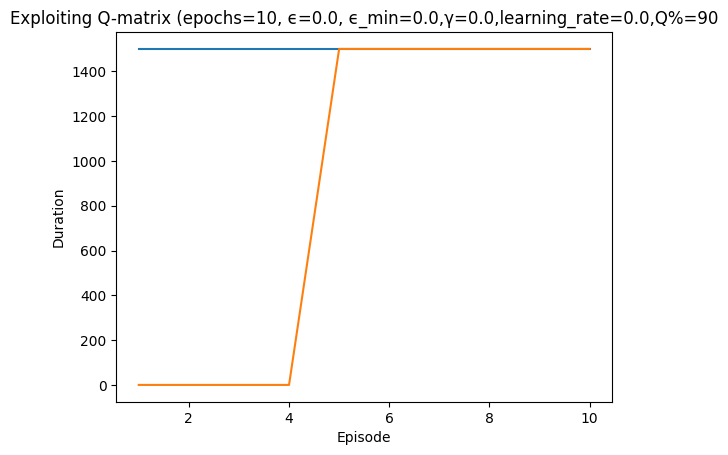

In [11]:
# Evaluate an agent that exploits the Q-table learnt above
tabularq_exploit_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=tqa.QTabularLearner(ep, trained=tabularq_run["learner"], gamma=0.0, learning_rate=0.0, exploit_percentile=90),
    episode_count=eval_episode_count,
    iteration_count=iteration_count,
    epsilon=0.0,
    render=False,
    verbosity=Verbosity.Quiet,
    title="Exploiting Q-matrix",
)

In [13]:
# Evaluate the Deep Q-learning agent
dql_run = learner.epsilon_greedy_search(
    cyberbattle_gym_env=gym_env,
    environment_properties=ep,
    learner=dqla.DeepQLearnerPolicy(
        ep=ep,
        gamma=0.015,
        replay_memory_size=10000,
        target_update=10,
        batch_size=512,
        # torch default learning rate is 1e-2
        # a large value helps converge in less episodes
        learning_rate=0.01,
    ),
    episode_count=training_episode_count,
    iteration_count=iteration_count,
    epsilon=0.90,
    epsilon_exponential_decay=5000,
    epsilon_minimum=0.10,
    verbosity=Verbosity.Quiet,
    render=False,
    plot_episodes_length=False,
    title="DQL",
)

###### DQL
Learning with: episode_count=20,iteration_count=1500,ϵ=0.9,ϵ_min=0.1, ϵ_expdecay=5000,γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10
  ## Episode: 1/20 'DQL' ϵ=0.9000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 5|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 5|reward:   11.0|last_reward_at:    5|Elapsed Time: 0:00:00||
/Users/phurwasherpa/Downloads/CyberBattleSim/cyberbattle/agents/baseline/agent_dql.py:408: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:278.)
  state_batch = torch.tensor(states_to_consider).to(device)
Episode 1|Iteration 9|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 1|Iteration 9|reward:   22.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 1|Iteration 14|reward:   31.0|last_reward_at:    9|

  Episode 1 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/150 (0.02)
    explore-remote: 8/539 (0.01)
    explore-connect: 2/507 (0.00)
    exploit-local: 0/25 (0.00)
    exploit-remote: 0/220 (0.00)
    exploit-connect: 3/43 (0.07)
  exploit deflected to exploration: 24
  ## Episode: 2/20 'DQL' ϵ=0.6928, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 2|Iteration 8|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 2|Iteration 13|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 2|Iteration 13|reward:   22.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 2|Iteration 18|reward:   22.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 2|Iteration 23|reward:   22.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 2|Iteration 29|reward:   22.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 2|Iteration 35|reward:   22.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 2|Iteration 41|reward:   22.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 2

  Episode 2 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/81 (0.02)
    explore-remote: 5/447 (0.01)
    explore-connect: 3/434 (0.01)
    exploit-local: 1/86 (0.01)
    exploit-remote: 3/388 (0.01)
    exploit-connect: 2/48 (0.04)
  exploit deflected to exploration: 70
  ## Episode: 3/20 'DQL' ϵ=0.5391, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 3|Iteration 6|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 3|Iteration 6|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 3|Iteration 9|reward:   33.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 3|Iteration 9|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 3|Iteration 14|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 3|Iteration 19|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 3|Iteration 23|reward:   47.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 3|Iteration 23|reward:   47.0|last_reward_at:   23|Elapsed Time: 0:00:00||
Episode 3|It

  Episode 3 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/73 (0.04)
    explore-remote: 5/385 (0.01)
    explore-connect: 1/357 (0.00)
    exploit-local: 0/124 (0.00)
    exploit-remote: 3/543 (0.01)
    exploit-connect: 4/2 (0.67)
  exploit deflected to exploration: 105
  ## Episode: 4/20 'DQL' ϵ=0.4253, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 4|Iteration 3|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 4|Iteration 3|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 4|Iteration 8|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 4|Iteration 14|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 4|Iteration 16|reward:   31.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 4|Iteration 16|reward:   31.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 4|Iteration 22|reward:   31.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 4|Iteration 28|reward:   31.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 4|I

  Episode 4 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/45 (0.04)
    explore-remote: 0/318 (0.00)
    explore-connect: 0/299 (0.00)
    exploit-local: 1/129 (0.01)
    exploit-remote: 8/691 (0.01)
    exploit-connect: 5/2 (0.71)
  exploit deflected to exploration: 134
  ## Episode: 5/20 'DQL' ϵ=0.3410, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 5|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 5|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 5|Iteration 3|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 5|Iteration 3|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 5|Iteration 9|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 5|Iteration 14|reward:   33.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 5|Iteration 14|reward:   33.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 5|Iteration 17|reward:   33.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 5|Iteration 21|reward:   44.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 5|Iteration 21|reward:   44.0|last_reward_at:   21|Elapsed Time: 0:00:00||
Episode 5|Iteration 27|reward:   44.0|last_reward_at:   21|Elapsed Time: 0:00:00||
Episode 5|

  Episode 5 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/55 (0.04)
    explore-remote: 1/263 (0.00)
    explore-connect: 0/262 (0.00)
    exploit-local: 1/144 (0.01)
    exploit-remote: 7/752 (0.01)
    exploit-connect: 5/8 (0.38)
  exploit deflected to exploration: 135
  ## Episode: 6/20 'DQL' ϵ=0.2785, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 6|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 6|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 6|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 6|Iteration 4|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 6|Iteration 4|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 6|Iteration 5|reward:   33.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 6|Iteration 5|reward:   33.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 6|Iteration 10|reward:   33.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 6|Iteration 15|reward:   33.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 6|Iteration 19|reward:   33.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 6|Iteration 24|reward:   33.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 6|It

  Episode 6 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/29 (0.06)
    explore-remote: 3/265 (0.01)
    explore-connect: 0/231 (0.00)
    exploit-local: 1/144 (0.01)
    exploit-remote: 5/803 (0.01)
    exploit-connect: 5/12 (0.29)
  exploit deflected to exploration: 154
  ## Episode: 7/20 'DQL' ϵ=0.2323, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 7|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 7|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 7|Iteration 6|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 7|Iteration 11|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 7|Iteration 16|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 7|Iteration 17|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 7|Iteration 17|reward:   22.0|last_reward_at:   17|Elapsed Time: 0:00:00||
Episode 7|Iteration 22|reward:   22.0|last_reward_at:   17|Elapsed Time: 0:00:00||
Episode 7|Iteration 27|reward:   22.0|last_reward_at:   17|Elapsed Time: 0:00:00||
Episode 7|Iteration 29|reward:   33.0|last_reward_at:   17|Elapsed Time: 0:00:00||
Episode 7|Iteration 29|reward:   33.0|last_reward_at:   29|Elapsed Time: 0:00:00||
Episode 

  Episode 7 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/37 (0.03)
    explore-remote: 2/219 (0.01)
    explore-connect: 0/200 (0.00)
    exploit-local: 2/171 (0.01)
    exploit-remote: 6/826 (0.01)
    exploit-connect: 5/31 (0.14)
  exploit deflected to exploration: 161
  ## Episode: 8/20 'DQL' ϵ=0.1980, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 8|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 8|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 8|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 8|Iteration 3|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 8|Iteration 3|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 8|Iteration 7|reward:   31.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 8|Iteration 7|reward:   31.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 8|Iteration 8|reward:  131.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 8|Iteration 8|reward:  131.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 8|Iteration 9|reward:  142.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 8|Iteration 9|reward:  142.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 8|Iterat

  Episode 8 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/38 (0.03)
    explore-remote: 0/189 (0.00)
    explore-connect: 0/221 (0.00)
    exploit-local: 2/176 (0.01)
    exploit-remote: 8/853 (0.01)
    exploit-connect: 5/7 (0.42)
  exploit deflected to exploration: 169
  ## Episode: 9/20 'DQL' ϵ=0.1726, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 9|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 9|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 9|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 9|Iteration 4|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 9|Iteration 4|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 9|Iteration 8|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 9|Iteration 13|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 9|Iteration 18|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 9|Iteration 23|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 9|Iteration 28|reward:   36.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 9|Iteration 28|reward:   36.0|last_reward_at:   28|Elapsed Time: 0:00:00||
Episode 9|I

  Episode 9 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/40 (0.02)
    explore-remote: 3/192 (0.02)
    explore-connect: 0/176 (0.00)
    exploit-local: 2/160 (0.01)
    exploit-remote: 5/905 (0.01)
    exploit-connect: 5/11 (0.31)
  exploit deflected to exploration: 179
  ## Episode: 10/20 'DQL' ϵ=0.1538, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 10|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 10|Iteration 4|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 10|Iteration 4|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 10|Iteration 8|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 10|Iteration 8|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 10|Iteration 9|reward:   33.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 10|Iteration 9|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 10|Iteration 14|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 10|Iteration 19|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 10|Iteration 19|reward:   44.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 10|Iteration 19|reward:   44.0|last_reward_at:   19|Elapsed Time: 0:00:00||


  Episode 10 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/36 (0.05)
    explore-remote: 3/175 (0.02)
    explore-connect: 0/160 (0.00)
    exploit-local: 1/153 (0.01)
    exploit-remote: 5/954 (0.01)
    exploit-connect: 5/6 (0.45)
  exploit deflected to exploration: 176
  ## Episode: 11/20 'DQL' ϵ=0.1398, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 11|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 11|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 11|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 11|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 11|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 11|Iteration 7|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 11|Iteration 11|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 11|Iteration 17|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 11|Iteration 18|reward:   36.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 11|Iteration 18|reward:   36.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 11|Iteration 24|reward:   42.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 11|Iteration 24|reward:   42.0|last_reward_at:   24|Elapsed Time: 0:00:00|

  Episode 11 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/26 (0.04)
    explore-remote: 0/181 (0.00)
    explore-connect: 0/169 (0.00)
    exploit-local: 2/156 (0.01)
    exploit-remote: 8/939 (0.01)
    exploit-connect: 5/13 (0.28)
  exploit deflected to exploration: 161
  ## Episode: 12/20 'DQL' ϵ=0.1295, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 12|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 12|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 12|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 12|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 12|Iteration 8|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 12|Iteration 14|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 12|Iteration 16|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 12|Iteration 16|reward:   22.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 12|Iteration 19|reward:   22.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 12|Iteration 23|reward:   22.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 12|Iteration 28|reward:   22.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 12|Iteration 32|reward:   33.0|last_reward_at:   16|Elapsed Time: 0:00:00

  Episode 12 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/38 (0.03)
    explore-remote: 1/165 (0.01)
    explore-connect: 1/137 (0.01)
    exploit-local: 2/181 (0.01)
    exploit-remote: 7/953 (0.01)
    exploit-connect: 4/10 (0.29)
  exploit deflected to exploration: 147
  ## Episode: 13/20 'DQL' ϵ=0.1219, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 13|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 13|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 13|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 13|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 13|Iteration 5|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 13|Iteration 5|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 13|Iteration 6|reward:   33.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 13|Iteration 6|reward:   33.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 13|Iteration 8|reward:   44.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 13|Iteration 8|reward:   44.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 13|Iteration 12|reward:   53.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 13|Iteration 12|reward:   53.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Ep

  Episode 13 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/32 (0.03)
    explore-remote: 4/132 (0.03)
    explore-connect: 0/137 (0.00)
    exploit-local: 2/165 (0.01)
    exploit-remote: 4/993 (0.00)
    exploit-connect: 5/25 (0.17)
  exploit deflected to exploration: 144
  ## Episode: 14/20 'DQL' ϵ=0.1162, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 14|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 14|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 14|Iteration 4|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 14|Iteration 5|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 14|Iteration 5|reward:   11.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 14|Iteration 11|reward:   11.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 14|Iteration 16|reward:   11.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 14|Iteration 21|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 14|Iteration 21|reward:   22.0|last_reward_at:   21|Elapsed Time: 0:00:00||
Episode 14|Iteration 26|reward:   33.0|last_reward_at:   21|Elapsed Time: 0:00:00||
Episode 14|Iteration 26|reward:   33.0|last_reward_at:   26|Elapsed Time: 0:00:00||
Episode 14|Iteration 31|reward:   33.0|last_reward_at:   26|Elapsed Time: 0:00:00

  Episode 14 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/36 (0.05)
    explore-remote: 0/175 (0.00)
    explore-connect: 1/144 (0.01)
    exploit-local: 1/170 (0.01)
    exploit-remote: 8/953 (0.01)
    exploit-connect: 4/6 (0.40)
  exploit deflected to exploration: 170
  ## Episode: 15/20 'DQL' ϵ=0.1120, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 15|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 15|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 15|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 15|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 15|Iteration 8|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 15|Iteration 8|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 15|Iteration 13|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 15|Iteration 18|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 15|Iteration 22|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 15|Iteration 26|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 15|Iteration 31|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 15|Iteration 36|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:00|

  Episode 15 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/29 (0.03)
    explore-remote: 1/176 (0.01)
    explore-connect: 0/152 (0.00)
    exploit-local: 2/182 (0.01)
    exploit-remote: 7/935 (0.01)
    exploit-connect: 5/10 (0.33)
  exploit deflected to exploration: 182
  ## Episode: 16/20 'DQL' ϵ=0.1089, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 16|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 16|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 16|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 16|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 16|Iteration 5|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 16|Iteration 5|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 16|Iteration 11|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 16|Iteration 16|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 16|Iteration 21|reward:   33.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 16|Iteration 21|reward:   33.0|last_reward_at:   21|Elapsed Time: 0:00:00||
Episode 16|Iteration 27|reward:   33.0|last_reward_at:   21|Elapsed Time: 0:00:00||
Episode 16|Iteration 31|reward:   33.0|last_reward_at:   21|Elapsed Time: 0:00:00|

  Episode 16 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/28 (0.07)
    explore-remote: 1/138 (0.01)
    explore-connect: 0/137 (0.00)
    exploit-local: 1/180 (0.01)
    exploit-remote: 7/976 (0.01)
    exploit-connect: 5/25 (0.17)
  exploit deflected to exploration: 146
  ## Episode: 17/20 'DQL' ϵ=0.1066, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 17|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 17|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 17|Iteration 4|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 17|Iteration 7|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 17|Iteration 7|reward:   11.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 17|Iteration 9|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 17|Iteration 9|reward:   22.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 17|Iteration 11|reward:   22.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 17|Iteration 16|reward:   36.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 17|Iteration 16|reward:   36.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 17|Iteration 18|reward:   86.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 17|Iteration 18|reward:   86.0|last_reward_at:   18|Elapsed Time: 0:00:00||

  Episode 17 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/24 (0.04)
    explore-remote: 1/138 (0.01)
    explore-connect: 0/156 (0.00)
    exploit-local: 2/165 (0.01)
    exploit-remote: 7/995 (0.01)
    exploit-connect: 5/6 (0.45)
  exploit deflected to exploration: 156
  ## Episode: 18/20 'DQL' ϵ=0.1049, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 18|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 18|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 18|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 18|Iteration 5|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 18|Iteration 9|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 18|Iteration 14|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 18|Iteration 14|reward:   22.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 18|Iteration 18|reward:   22.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 18|Iteration 22|reward:   36.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 18|Iteration 22|reward:   36.0|last_reward_at:   22|Elapsed Time: 0:00:00||
Episode 18|Iteration 28|reward:   36.0|last_reward_at:   22|Elapsed Time: 0:00:00||
Episode 18|Iteration 34|reward:   36.0|last_reward_at:   22|Elapsed Time: 0:00:00

  Episode 18 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/18 (0.10)
    explore-remote: 1/147 (0.01)
    explore-connect: 0/149 (0.00)
    exploit-local: 1/162 (0.01)
    exploit-remote: 7/984 (0.01)
    exploit-connect: 5/24 (0.17)
  exploit deflected to exploration: 160
  ## Episode: 19/20 'DQL' ϵ=0.1036, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 19|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 19|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 19|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 19|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 19|Iteration 4|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 19|Iteration 4|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 19|Iteration 10|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 19|Iteration 15|reward:   33.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 19|Iteration 15|reward:   33.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 19|Iteration 18|reward:   47.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 19|Iteration 18|reward:   47.0|last_reward_at:   18|Elapsed Time: 0:00:00||
Episode 19|Iteration 20|reward:   53.0|last_reward_at:   18|Elapsed Time: 0:00:00|

  Episode 19 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/20 (0.05)
    explore-remote: 4/156 (0.03)
    explore-connect: 0/149 (0.00)
    exploit-local: 2/178 (0.01)
    exploit-remote: 4/968 (0.00)
    exploit-connect: 5/13 (0.28)
  exploit deflected to exploration: 160
  ## Episode: 20/20 'DQL' ϵ=0.1027, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 20|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 20|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 20|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 20|Iteration 6|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 20|Iteration 7|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 20|Iteration 7|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 20|Iteration 10|reward:   33.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 20|Iteration 10|reward:   33.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 20|Iteration 15|reward:   33.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 20|Iteration 16|reward:   47.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 20|Iteration 16|reward:   47.0|last_reward_at:   16|Elapsed Time: 0:00:00||
Episode 20|Iteration 22|reward:   47.0|last_reward_at:   16|Elapsed Time: 0:00:00|

  Episode 20 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/25 (0.04)
    explore-remote: 0/145 (0.00)
    explore-connect: 0/124 (0.00)
    exploit-local: 2/145 (0.01)
    exploit-remote: 8/988 (0.01)
    exploit-connect: 5/57 (0.08)
  exploit deflected to exploration: 127
simulation ended


In [14]:
# Evaluate an agent that exploits the Q-function learnt above
dql_exploit_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=dql_run["learner"],
    episode_count=eval_episode_count,
    iteration_count=iteration_count,
    epsilon=0.0,
    epsilon_minimum=0.00,
    render=False,
    plot_episodes_length=False,
    verbosity=Verbosity.Quiet,
    title="Exploiting DQL",
)

###### Exploiting DQL
Learning with: episode_count=10,iteration_count=1500,ϵ=0.0,ϵ_min=0.0, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10
  ## Episode: 1/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 4|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 6|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 7|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 7|reward:   11.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 1|Iteration 11|reward:   11.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 1|Iteration 15|reward:   11.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 1|Iteration 17|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 1|Iteration 17|reward:   22.0|last_reward_at:   17|Elapsed Time: 0:00:00||
Episode 1|Iteration 21|reward:   22.0|last_reward_at:   17|Elapsed Time: 0:00:00||
Episode 1|Iteration 24|reward:   22.0|last_reward_at:   17|Elapsed Time: 0:00:00||
Episode 1|

  Episode 1 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/22 (0.04)
    explore-remote: 0/96 (0.00)
    explore-connect: 0/68 (0.00)
    exploit-local: 2/198 (0.01)
    exploit-remote: 8/1089 (0.01)
    exploit-connect: 5/11 (0.31)
  exploit deflected to exploration: 187
  ## Episode: 2/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 2|Iteration 4|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 2|Iteration 4|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 2|Iteration 8|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 2|Iteration 12|reward:   33.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 2|Iteration 12|reward:   33.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 2|Iteration 16|reward:   33.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 2|Iteration 21|reward:   33.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 2|Iteration 22|reward:   47.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 2|I

  Episode 2 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/11 (0.08)
    explore-remote: 0/100 (0.00)
    explore-connect: 0/67 (0.00)
    exploit-local: 2/177 (0.01)
    exploit-remote: 8/1117 (0.01)
    exploit-connect: 5/12 (0.29)
  exploit deflected to exploration: 179
  ## Episode: 3/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 3|Iteration 7|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 3|Iteration 9|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 3|Iteration 9|reward:   22.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 3|Iteration 14|reward:   33.0|last_reward_at:    9|Elapsed Time: 0:00:00||
Episode 3|Iteration 14|reward:   33.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 3|Iteration 17|reward:   33.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 3|Iteration 22|reward:   33.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 3|Iteration 27|reward:   33.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 3|I

  Episode 3 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/13 (0.07)
    explore-remote: 0/80 (0.00)
    explore-connect: 1/73 (0.01)
    exploit-local: 2/194 (0.01)
    exploit-remote: 8/1115 (0.01)
    exploit-connect: 4/9 (0.31)
  exploit deflected to exploration: 168
  ## Episode: 4/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 4|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 4|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 4|Iteration 7|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 4|Iteration 11|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 4|Iteration 13|reward:   33.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 4|Iteration 13|reward:   33.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 4|Iteration 18|reward:   33.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 4|Iteration 22|reward:   33.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 4|Iteration 27|reward:   33.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 4|

  Episode 4 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/17 (0.00)
    explore-remote: 1/83 (0.01)
    explore-connect: 0/69 (0.00)
    exploit-local: 3/193 (0.02)
    exploit-remote: 7/1096 (0.01)
    exploit-connect: 5/26 (0.16)
  exploit deflected to exploration: 170
  ## Episode: 5/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 5|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 5|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 5|Iteration 2|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 5|Iteration 2|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 5|Iteration 7|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 5|Iteration 11|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 5|Iteration 12|reward:   31.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 5|Iteration 12|reward:   31.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 5|Iteration 14|reward:   31.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 5|Iteration 17|reward:   42.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 5|Iteration 17|reward:   42.0|last_reward_at:   17|Elapsed Time: 0:00:00||
Episode 5|

  Episode 5 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/14 (0.07)
    explore-remote: 1/76 (0.01)
    explore-connect: 0/74 (0.00)
    exploit-local: 2/192 (0.01)
    exploit-remote: 7/1116 (0.01)
    exploit-connect: 5/12 (0.29)
  exploit deflected to exploration: 166
  ## Episode: 6/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 6|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 6|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 6|Iteration 6|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 6|Iteration 8|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 6|Iteration 8|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 6|Iteration 10|reward:   33.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 6|Iteration 10|reward:   33.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 6|Iteration 14|reward:   33.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 6|Iteration 15|reward:   44.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 6|Iteration 15|reward:   44.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 6|Iteration 19|reward:   44.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 6|

  Episode 6 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/11 (0.15)
    explore-remote: 0/80 (0.00)
    explore-connect: 0/81 (0.00)
    exploit-local: 1/167 (0.01)
    exploit-remote: 8/1138 (0.01)
    exploit-connect: 5/7 (0.42)
  exploit deflected to exploration: 174
  ## Episode: 7/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 7|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 7|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 7|Iteration 4|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 7|Iteration 4|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 7|Iteration 5|reward:   33.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 7|Iteration 5|reward:   33.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 7|Iteration 6|reward:   44.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 7|Iteration 6|reward:   44.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 7|Iteration 8|reward:   58.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 7|Iteration 8|reward:   58.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 7|Iteration 10|reward:   67.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 7|Itera

  Episode 7 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 0/14 (0.00)
    explore-remote: 1/75 (0.01)
    explore-connect: 0/80 (0.00)
    exploit-local: 3/222 (0.01)
    exploit-remote: 7/1084 (0.01)
    exploit-connect: 5/9 (0.36)
  exploit deflected to exploration: 170
  ## Episode: 8/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 8|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 8|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 8|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 8|Iteration 8|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 8|Iteration 13|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 8|Iteration 18|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 8|Iteration 23|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 8|Iteration 27|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 8|Iteration 27|reward:   22.0|last_reward_at:   27|Elapsed Time: 0:00:00||
Episode 8|Iteration 32|reward:   22.0|last_reward_at:   27|Elapsed Time: 0:00:00||
Episode 8|Iteration 37|reward:   22.0|last_reward_at:   27|Elapsed Time: 0:00:00||
Episode 8

  Episode 8 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/10 (0.09)
    explore-remote: 0/84 (0.00)
    explore-connect: 0/71 (0.00)
    exploit-local: 2/164 (0.01)
    exploit-remote: 8/1110 (0.01)
    exploit-connect: 5/45 (0.10)
  exploit deflected to exploration: 166
  ## Episode: 9/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 9|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 9|Iteration 4|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 9|Iteration 5|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 9|Iteration 5|reward:   11.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 9|Iteration 7|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 9|Iteration 7|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 9|Iteration 10|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 9|Iteration 15|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 9|Iteration 19|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 9|Iteration 21|reward:   36.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 9|Iteration 21|reward:   36.0|last_reward_at:   21|Elapsed Time: 0:00:00||
Episode 9|I

  Episode 9 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/16 (0.06)
    explore-remote: 0/86 (0.00)
    explore-connect: 0/67 (0.00)
    exploit-local: 2/200 (0.01)
    exploit-remote: 8/1098 (0.01)
    exploit-connect: 5/17 (0.23)
  exploit deflected to exploration: 170
  ## Episode: 10/10 'Exploiting DQL' ϵ=0.0000, γ=0.015, lr=0.01, replaymemory=10000,
batch=512, target_update=10


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 10|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 10|Iteration 4|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 10|Iteration 5|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 10|Iteration 5|reward:   11.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 10|Iteration 8|reward:   22.0|last_reward_at:    5|Elapsed Time: 0:00:00||
Episode 10|Iteration 8|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 10|Iteration 13|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 10|Iteration 17|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 10|Iteration 22|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 10|Iteration 23|reward:   33.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 10|Iteration 23|reward:   33.0|last_reward_at:   23|Elapsed Time: 0:00:00||

  Episode 10 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/13 (0.07)
    explore-remote: 1/93 (0.01)
    explore-connect: 0/83 (0.00)
    exploit-local: 2/188 (0.01)
    exploit-remote: 7/1099 (0.01)
    exploit-connect: 5/8 (0.38)
  exploit deflected to exploration: 191
simulation ended


In [15]:
# Evaluate the random agent
random_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=learner.RandomPolicy(),
    episode_count=eval_episode_count,
    iteration_count=iteration_count,
    epsilon=1.0,  # purely random
    render=False,
    verbosity=Verbosity.Quiet,
    plot_episodes_length=False,
    title="Random search",
)

###### Random search
Learning with: episode_count=10,iteration_count=1500,ϵ=1.0,ϵ_min=0.0, 
  ## Episode: 1/10 'Random search' ϵ=1.0000, 


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 1|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 1|Iteration 13|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 1|Iteration 24|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 1|Iteration 37|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 1|Iteration 42|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 1|Iteration 42|reward:   22.0|last_reward_at:   42|Elapsed Time: 0:00:00||
Episode 1|Iteration 50|reward:   33.0|last_reward_at:   42|Elapsed Time: 0:00:00||
Episode 1|Iteration 50|reward:   33.0|last_reward_at:   50|Elapsed Time: 0:00:00||
Episode 1|Iteration 51|reward:   47.0|last_reward_at:   50|Elapsed Time: 0:00:00||
Episode 

  Episode 1 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/131 (0.02)
    explore-remote: 8/714 (0.01)
    explore-connect: 5/639 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 2/10 'Random search' ϵ=1.0000, 


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 2|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 2|Iteration 14|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 2|Iteration 14|reward:   22.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 2|Iteration 29|reward:   22.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 2|Iteration 33|reward:   33.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 2|Iteration 33|reward:   33.0|last_reward_at:   33|Elapsed Time: 0:00:00||
Episode 2|Iteration 48|reward:   33.0|last_reward_at:   33|Elapsed Time: 0:00:00||
Episode 2|Iteration 57|reward:   33.0|last_reward_at:   33|Elapsed Time: 0:00:00||
Episode 2|Iteration 60|reward:   42.0|last_reward_at:   33|Elapsed Time: 0:00:00||
Episode 

  Episode 2 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/161 (0.02)
    explore-remote: 8/696 (0.01)
    explore-connect: 3/629 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 3/10 'Random search' ϵ=1.0000, 


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 3|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 3|Iteration 3|reward:   11.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 3|Iteration 7|reward:   22.0|last_reward_at:    3|Elapsed Time: 0:00:00||
Episode 3|Iteration 7|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 3|Iteration 12|reward:   33.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 3|Iteration 12|reward:   33.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 3|Iteration 19|reward:   33.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 3|Iteration 33|reward:   33.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 3|Iteration 42|reward:   42.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 3|Iteration 42|reward:   42.0|last_reward_at:   42|Elapsed Time: 0:00:00||
Episode 3|

  Episode 3 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/144 (0.01)
    explore-remote: 8/692 (0.01)
    explore-connect: 3/651 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 4/10 'Random search' ϵ=1.0000, 


Episode 4|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 7|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 4|Iteration 7|reward:   11.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 4|Iteration 13|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 4|Iteration 13|reward:   22.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 4|Iteration 15|reward:   31.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 4|Iteration 15|reward:   31.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 4|Iteration 26|reward:  131.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 4|Iteration 26|reward:  131.0|last_reward_at:   26|Elapsed Time: 0:00:00||
Episode 4|Iteration 38|reward:  131.0|last_reward_at:   26|Elapsed Time: 0:00:00||
Episode 4|Iteration 42|reward:  145.0|last_reward_at:   26|Elapsed Time: 0:00:00||
Episode 

  Episode 4 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/178 (0.01)
    explore-remote: 8/637 (0.01)
    explore-connect: 3/672 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 5/10 'Random search' ϵ=1.0000, 


Episode 5|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 5|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 5|Iteration 14|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 5|Iteration 14|reward:   11.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 5|Iteration 29|reward:   11.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 5|Iteration 32|reward:   22.0|last_reward_at:   14|Elapsed Time: 0:00:00||
Episode 5|Iteration 32|reward:   22.0|last_reward_at:   32|Elapsed Time: 0:00:00||
Episode 5|Iteration 43|reward:   33.0|last_reward_at:   32|Elapsed Time: 0:00:00||
Episode 5|Iteration 43|reward:   33.0|last_reward_at:   43|Elapsed Time: 0:00:00||
Episode 5|Iteration 57|reward:   33.0|last_reward_at:   43|Elapsed Time: 0:00:00||
Episode 5|Iteration 72|reward:   33.0|last_reward_at:   43|Elapsed Time: 0:00:00||
Episode 5|Iteration 88|reward:   33.0|last_reward_at:   43|Elapsed Time: 0:00:00||
Episod

  Episode 5 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/192 (0.01)
    explore-remote: 8/700 (0.01)
    explore-connect: 3/595 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 6/10 'Random search' ϵ=1.0000, 


Episode 6|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 6|Iteration 1|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 6|Iteration 1|reward:   11.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 6|Iteration 6|reward:   22.0|last_reward_at:    1|Elapsed Time: 0:00:00||
Episode 6|Iteration 6|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 6|Iteration 12|reward:   33.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 6|Iteration 12|reward:   33.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 6|Iteration 19|reward:   42.0|last_reward_at:   12|Elapsed Time: 0:00:00||
Episode 6|Iteration 19|reward:   42.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 6|Iteration 34|reward:   42.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 6|Iteration 47|reward:   42.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 6|Iteration 54|reward:   56.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 6

  Episode 6 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/162 (0.02)
    explore-remote: 8/661 (0.01)
    explore-connect: 5/661 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 7/10 'Random search' ϵ=1.0000, 


Episode 7|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 7|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 7|Iteration 7|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 7|Iteration 7|reward:   11.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 7|Iteration 15|reward:   22.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 7|Iteration 15|reward:   22.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 7|Iteration 19|reward:   33.0|last_reward_at:   15|Elapsed Time: 0:00:00||
Episode 7|Iteration 19|reward:   33.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 7|Iteration 27|reward:   42.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 7|Iteration 27|reward:   42.0|last_reward_at:   27|Elapsed Time: 0:00:00||
Episode 7|Iteration 30|reward:  142.0|last_reward_at:   27|Elapsed Time: 0:00:00||
Episode 7|Iteration 30|reward:  142.0|last_reward_at:   30|Elapsed Time: 0:00:00||
Episode 

  Episode 7 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/154 (0.02)
    explore-remote: 8/680 (0.01)
    explore-connect: 5/650 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 8/10 'Random search' ϵ=1.0000, 


Episode 8|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 8|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 8|Iteration 4|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 8|Iteration 4|reward:   11.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 8|Iteration 13|reward:   22.0|last_reward_at:    4|Elapsed Time: 0:00:00||
Episode 8|Iteration 13|reward:   22.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 8|Iteration 27|reward:   22.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 8|Iteration 28|reward:   31.0|last_reward_at:   13|Elapsed Time: 0:00:00||
Episode 8|Iteration 28|reward:   31.0|last_reward_at:   28|Elapsed Time: 0:00:00||
Episode 8|Iteration 37|reward:  131.0|last_reward_at:   28|Elapsed Time: 0:00:00||
Episode 8|Iteration 37|reward:  131.0|last_reward_at:   37|Elapsed Time: 0:00:00||
Episode 8|Iteration 51|reward:  131.0|last_reward_at:   37|Elapsed Time: 0:00:00||
Episode 

  Episode 8 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 3/144 (0.02)
    explore-remote: 8/681 (0.01)
    explore-connect: 5/659 (0.01)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 9/10 'Random search' ϵ=1.0000, 


Episode 9|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 9|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 9|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 9|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 9|Iteration 8|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 9|Iteration 8|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 9|Iteration 19|reward:   22.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 9|Iteration 19|reward:   33.0|last_reward_at:    8|Elapsed Time: 0:00:00||
Episode 9|Iteration 19|reward:   33.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 9|Iteration 32|reward:   33.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 9|Iteration 39|reward:   44.0|last_reward_at:   19|Elapsed Time: 0:00:00||
Episode 9|Iteration 39|reward:   44.0|last_reward_at:   39|Elapsed Time: 0:00:00||
Episode 9|

  Episode 9 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 2/117 (0.02)
    explore-remote: 8/726 (0.01)
    explore-connect: 3/644 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 10/10 'Random search' ϵ=1.0000, 


Episode 10|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 10|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 10|Iteration 2|reward:   11.0|last_reward_at: ----|Elapsed Time: 0:00:00||
Episode 10|Iteration 2|reward:   11.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 10|Iteration 6|reward:   22.0|last_reward_at:    2|Elapsed Time: 0:00:00||
Episode 10|Iteration 6|reward:   22.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 10|Iteration 7|reward:   33.0|last_reward_at:    6|Elapsed Time: 0:00:00||
Episode 10|Iteration 7|reward:   33.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 10|Iteration 10|reward:   44.0|last_reward_at:    7|Elapsed Time: 0:00:00||
Episode 10|Iteration 10|reward:   44.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 10|Iteration 16|reward:   58.0|last_reward_at:   10|Elapsed Time: 0:00:00||
Episode 10|Iteration 16|reward:   58.0|last_reward_at:   16|Elapsed Time: 0:00:00||


  Episode 10 stopped at t=1500 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 1/100 (0.01)
    explore-remote: 8/713 (0.01)
    explore-connect: 2/676 (0.00)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
simulation ended


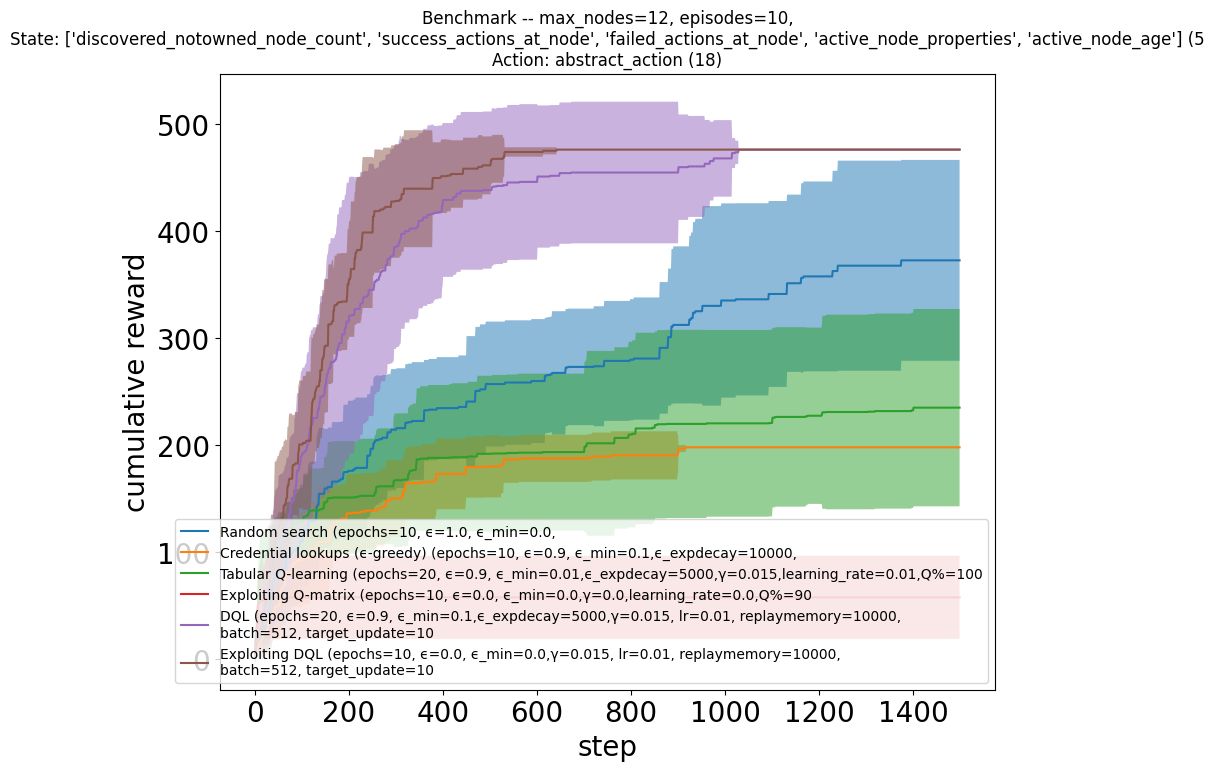

In [16]:
# Compare and plot results for all the agents
all_runs = [random_run, credlookup_run, tabularq_run, tabularq_exploit_run, dql_run, dql_exploit_run]

# Plot averaged cumulative rewards for DQL vs Random vs DQL-Exploit
themodel = dqla.CyberBattleStateActionModel(ep)
p.plot_averaged_cummulative_rewards(
    all_runs=all_runs,
    title=f"Benchmark -- max_nodes={ep.maximum_node_count}, episodes={eval_episode_count},\n"
    f"State: {[f.name() for f in themodel.state_space.feature_selection]} "
    f"({len(themodel.state_space.feature_selection)}\n"
    f"Action: abstract_action ({themodel.action_space.flat_size()})",
    save_at=os.path.join(plots_dir, f"benchmark-{gymid}-cumrewards.png"),
)

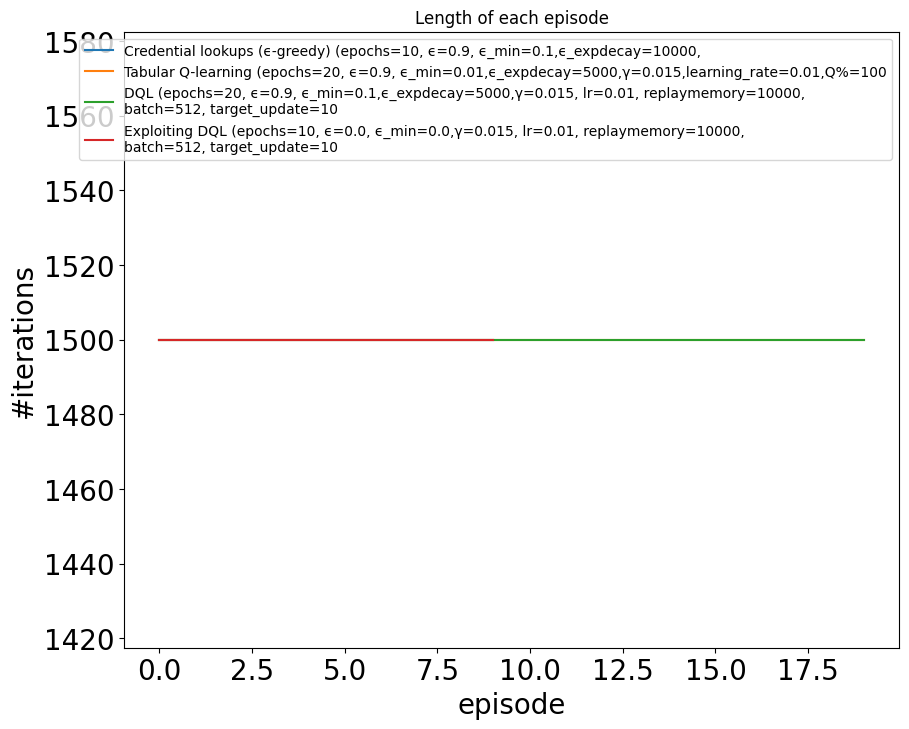

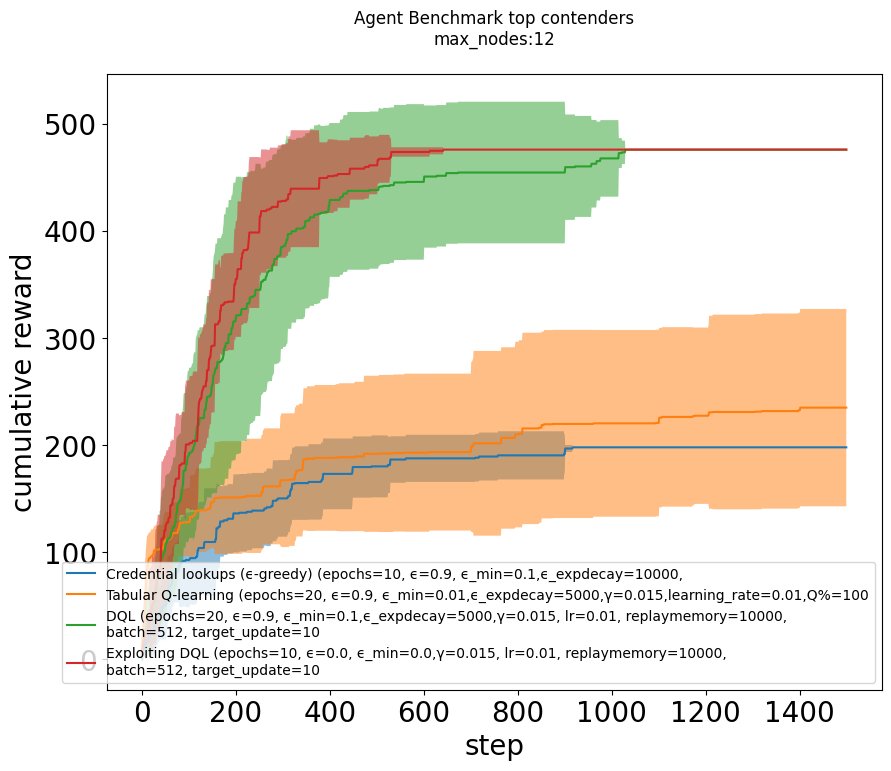

In [17]:
contenders = [credlookup_run, tabularq_run, dql_run, dql_exploit_run]
p.plot_episodes_length(contenders)
p.plot_averaged_cummulative_rewards(title=f"Agent Benchmark top contenders\n" f"max_nodes:{ep.maximum_node_count}\n", all_runs=contenders,
                                    save_at=os.path.join(plots_dir, f"benchmark-{gymid}-cumreward_contenders.png"))

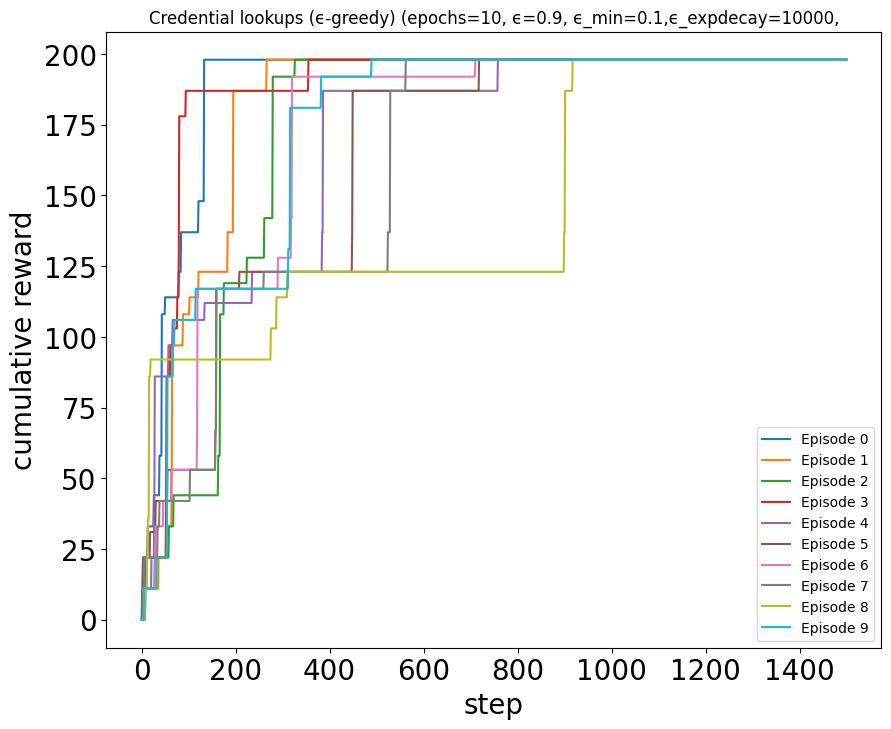

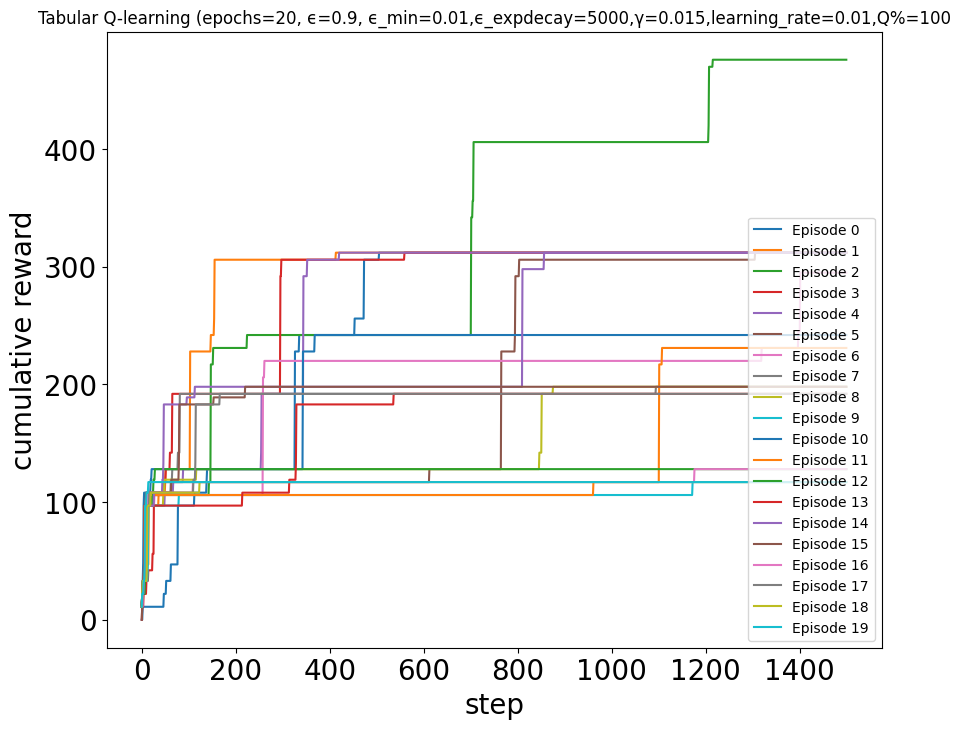

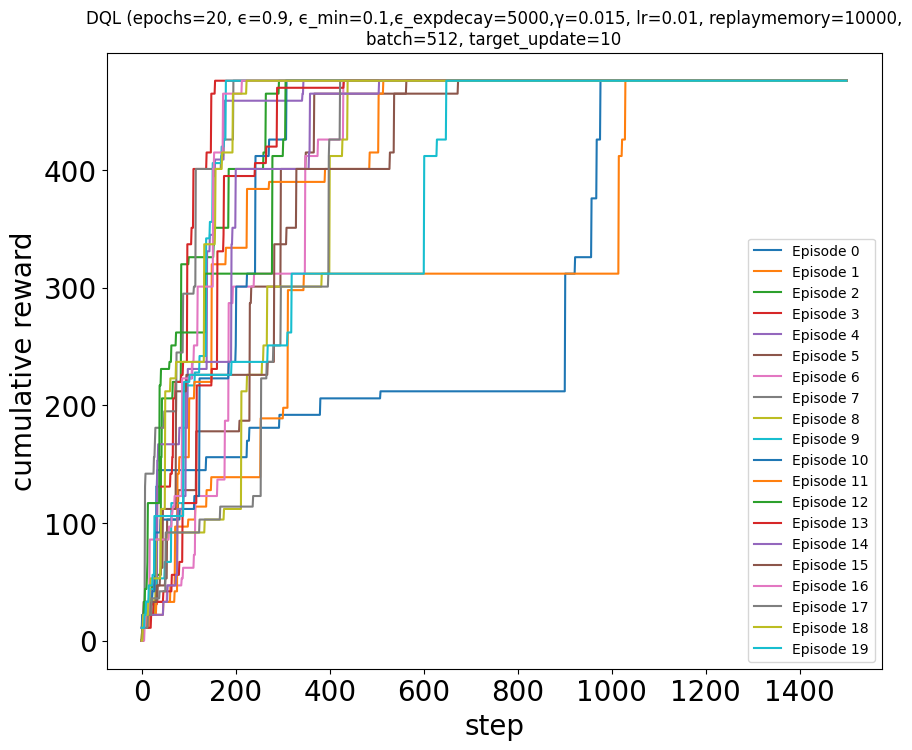

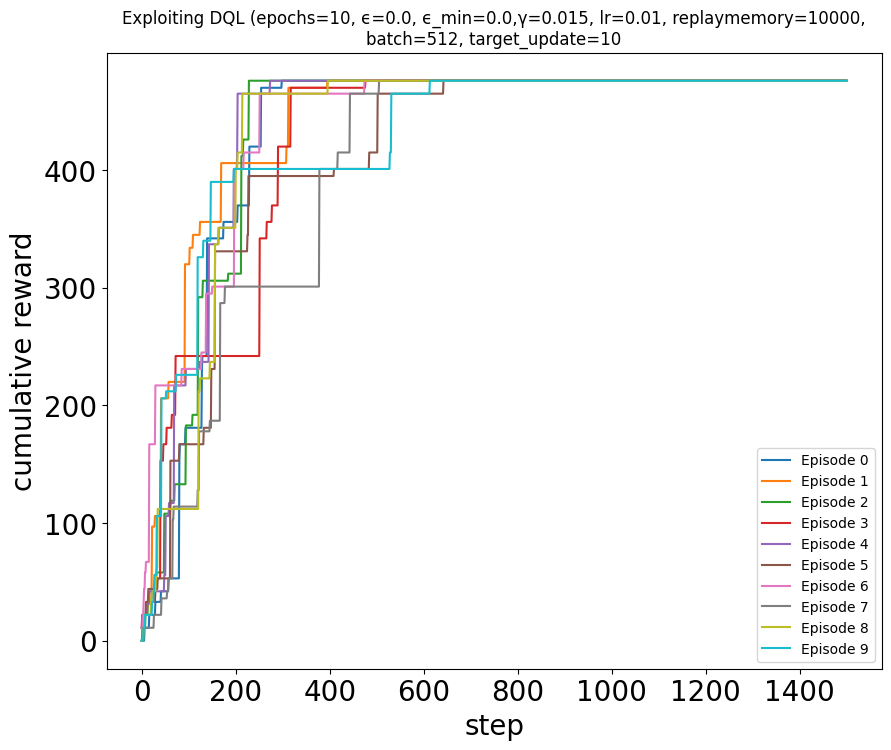

In [18]:
# Plot cumulative rewards for all episodes
for r in contenders:
    p.plot_all_episodes(r)